In [3]:
import geopandas as gpd
import fiona

fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'
us_cities = gpd.read_file('chapter_07_data/USCities.kml')
us_cities


Name description timestamp begin end altitudeMode  tessellate  \
0   Las Vegas        None       NaT   NaT NaT         None          -1   
1    New York        None       NaT   NaT NaT         None          -1   
2  Washington        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                               geometry  
0        0          -1      None  None  POINT Z (-117.05255 34.66010 0.00000)  
1        0          -1      None  None   POINT Z (-75.21057 40.87178 0.00000)  
2        0          -1      None  None   POINT Z (-78.37464 38.81382 0.00000)

In [4]:
canada_cities = gpd.read_file('chapter_07_data/CanadaCities.kml')
canada_cities


Name description timestamp begin end altitudeMode  tessellate  \
0    Toronto        None       NaT   NaT NaT         None          -1   
1     Quebec        None       NaT   NaT NaT         None          -1   
2   Montreal        None       NaT   NaT NaT         None          -1   
3  Vancouver        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                               geometry  
0        0          -1      None  None   POINT Z (-80.27265 44.26100 0.00000)  
1        0          -1      None  None   POINT Z (-71.52753 47.08515 0.00000)  
2        0          -1      None  None   POINT Z (-74.64765 46.02755 0.00000)  
3        0          -1      None  None  POINT Z (-123.30126 49.72246 0.00000)

In [5]:
mexico_cities = gpd.read_file('chapter_07_data/MexicoCities.kml')
mexico_cities


Name description timestamp begin end altitudeMode  tessellate  \
0  Guadalajara        None       NaT   NaT NaT         None          -1   
1  Mexico City        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                               geometry  
0        0          -1      None  None  POINT Z (-103.10867 20.79000 0.00000)  
1        0          -1      None  None   POINT Z (-99.37332 19.75946 0.00000)

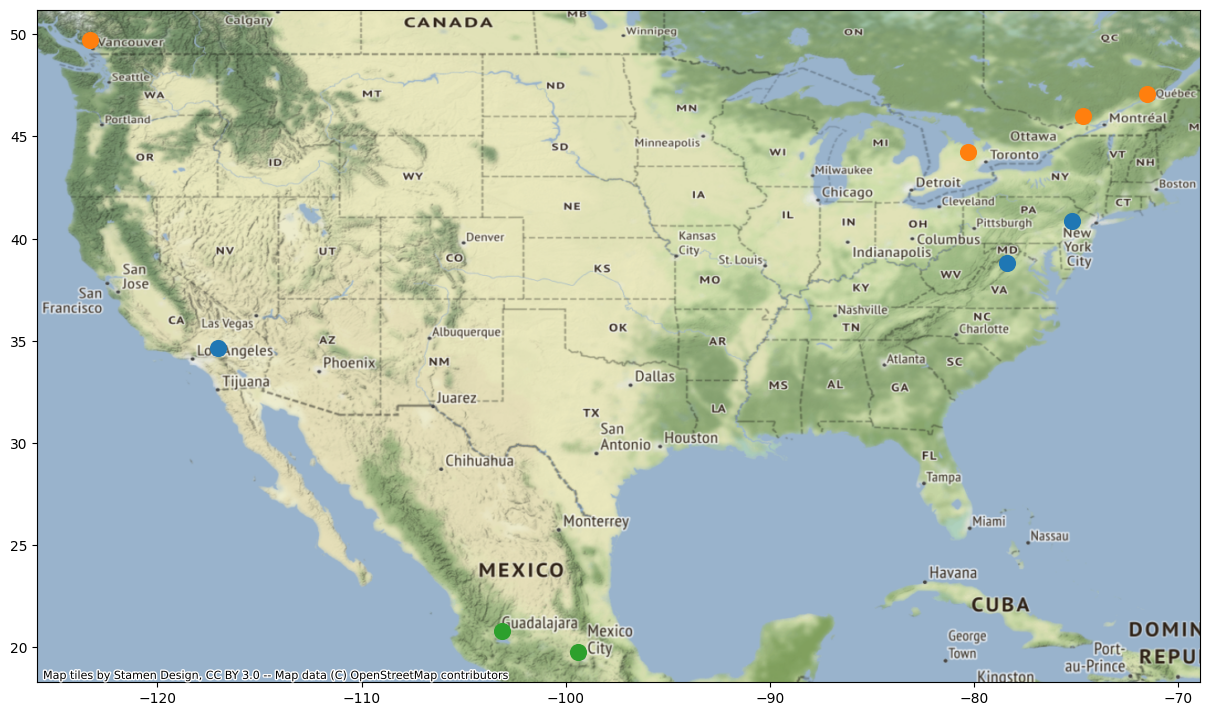

In [6]:
import contextily as cx

# us cities
ax = us_cities.plot(markersize=128, figsize=(15,15))

# canada cities
canada_cities.plot(ax=ax, markersize=128)

# mexico cities
mexico_cities.plot(ax = ax, markersize=128)

# contextily basemap
cx.add_basemap(ax, crs=us_cities.crs)


In [8]:
import pandas as pd

cities = pd.concat([us_cities, canada_cities, mexico_cities])
cities


Name description timestamp begin end altitudeMode  tessellate  \
0    Las Vegas        None       NaT   NaT NaT         None          -1   
1     New York        None       NaT   NaT NaT         None          -1   
2   Washington        None       NaT   NaT NaT         None          -1   
0      Toronto        None       NaT   NaT NaT         None          -1   
1       Quebec        None       NaT   NaT NaT         None          -1   
2     Montreal        None       NaT   NaT NaT         None          -1   
3    Vancouver        None       NaT   NaT NaT         None          -1   
0  Guadalajara        None       NaT   NaT NaT         None          -1   
1  Mexico City        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                               geometry  
0        0          -1      None  None  POINT Z (-117.05255 34.66010 0.00000)  
1        0          -1      None  None   POINT Z (-75.21057 40.87178 0.00000)  
2        0          -1      None  None   POINT Z (-78.37464 38.81382 0.00000)  
0        0          -1      None  None   POINT Z (-80.27265 44.26100 0.00000)  
1        0          -1      None  None   POINT Z (-71.52753 47.08515 0.00000)  
2        0          -1      None  None   POINT Z (-74.64765 46.02755 0.00000)  
3        0          -1      None  None  POINT Z (-123.30126 49.72246 0.00000)  
0        0          -1      None  None  POINT Z (-103.10867 20.79000 0.00000)  
1        0          -1      None  None   POINT Z (-99.37332 19.75946 0.00000)

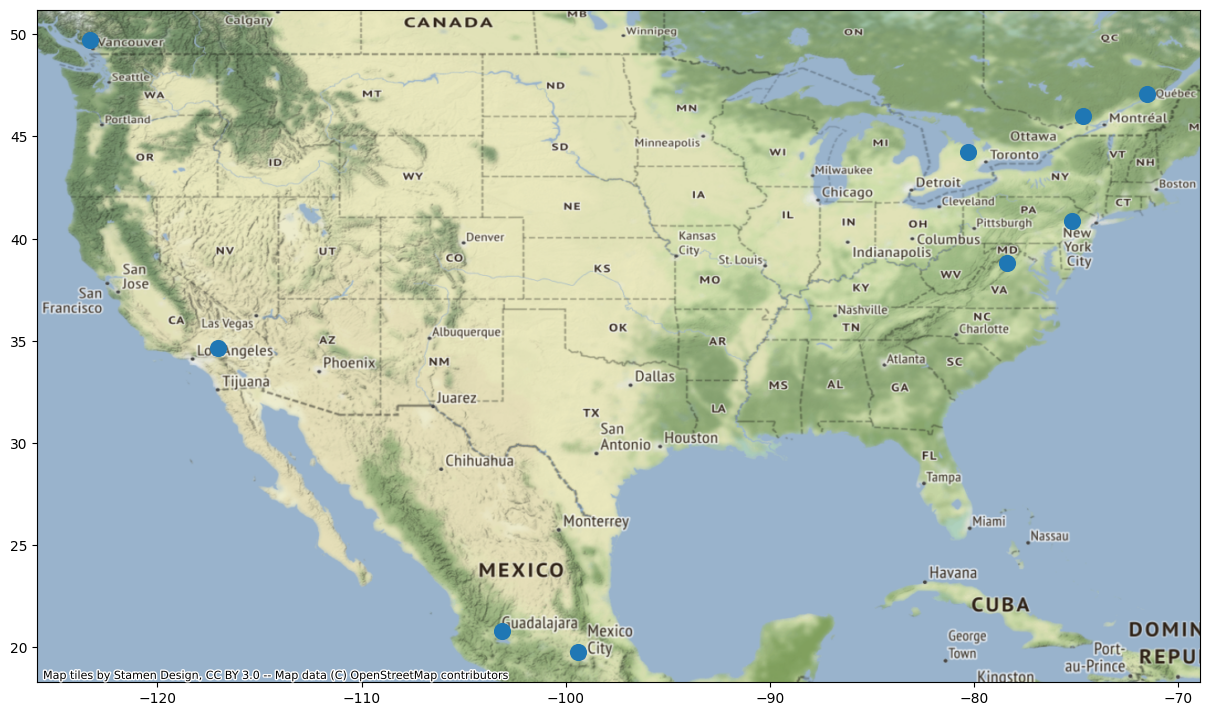

In [9]:
ax = cities.plot(markersize=128,figsize=(15,15))
cx.add_basemap(ax, crs=us_cities.crs)


In [10]:
lookup = pd.DataFrame({
    'city': [
        'Las Vegas',
         'New York',
         'Washington',
         'Toronto',
         'Quebec',
         'Montreal',
         'Vancouver',
         'Guadalajara',
         'Mexico City'
    ],
    'population': [
        1234,
        2345,
        3456,
        4567,
        4321,
        5432,
        6543,
        1357,
        2468
        
    ]
})

lookup


city  population
0    Las Vegas        1234
1     New York        2345
2   Washington        3456
3      Toronto        4567
4       Quebec        4321
5     Montreal        5432
6    Vancouver        6543
7  Guadalajara        1357
8  Mexico City        2468

In [11]:
cities_new = cities.merge(lookup, left_on='Name', right_on='city')
cities_new


Name description timestamp begin end altitudeMode  tessellate  \
0    Las Vegas        None       NaT   NaT NaT         None          -1   
1     New York        None       NaT   NaT NaT         None          -1   
2   Washington        None       NaT   NaT NaT         None          -1   
3      Toronto        None       NaT   NaT NaT         None          -1   
4       Quebec        None       NaT   NaT NaT         None          -1   
5     Montreal        None       NaT   NaT NaT         None          -1   
6    Vancouver        None       NaT   NaT NaT         None          -1   
7  Guadalajara        None       NaT   NaT NaT         None          -1   
8  Mexico City        None       NaT   NaT NaT         None          -1   

   extrude  visibility drawOrder  icon                               geometry  \
0        0          -1      None  None  POINT Z (-117.05255 34.66010 0.00000)   
1        0          -1      None  None   POINT Z (-75.21057 40.87178 0.00000)   
2        0          -1      None  None   POINT Z (-78.37464 38.81382 0.00000)   
3        0          -1      None  None   POINT Z (-80.27265 44.26100 0.00000)   
4        0          -1      None  None   POINT Z (-71.52753 47.08515 0.00000)   
5        0          -1      None  None   POINT Z (-74.64765 46.02755 0.00000)   
6        0          -1      None  None  POINT Z (-123.30126 49.72246 0.00000)   
7        0          -1      None  None  POINT Z (-103.10867 20.79000 0.00000)   
8        0          -1      None  None   POINT Z (-99.37332 19.75946 0.00000)   

          city  population  
0    Las Vegas        1234  
1     New York        2345  
2   Washington        3456  
3      Toronto        4567  
4       Quebec        4321  
5     Montreal        5432  
6    Vancouver        6543  
7  Guadalajara        1357  
8  Mexico City        2468

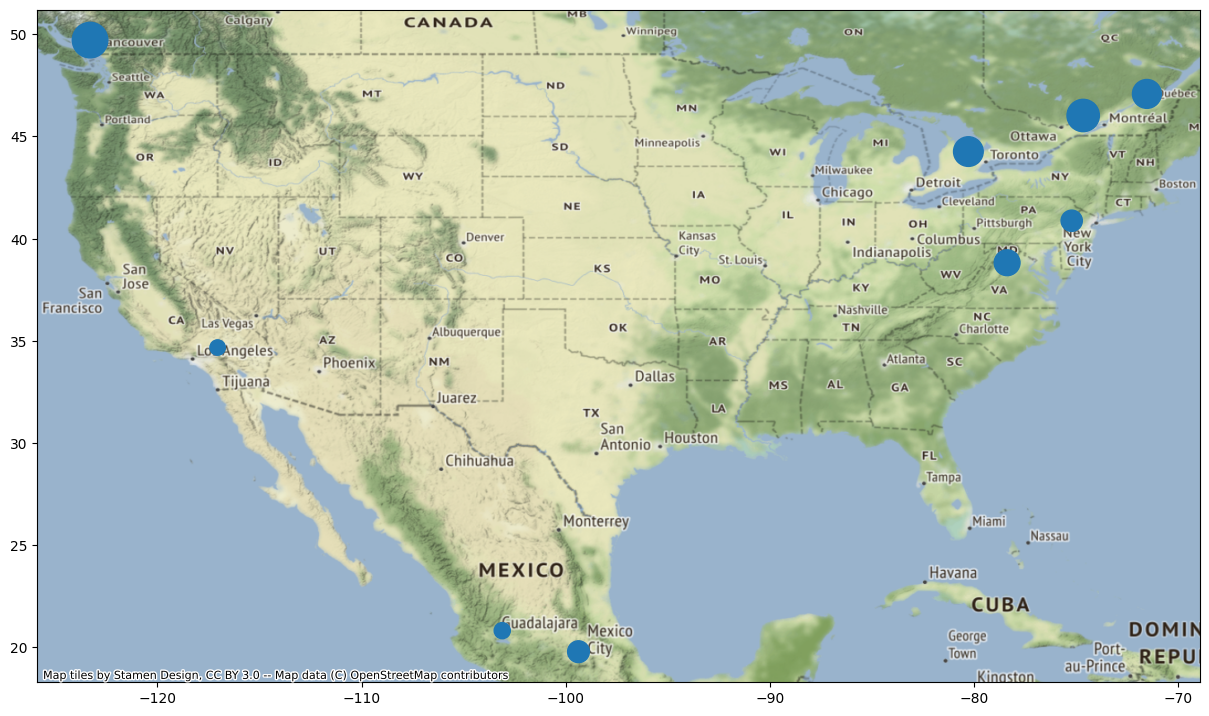

In [12]:
ax = cities_new.plot(markersize=cities_new['population'] // 10, figsize=(15,15))
cx.add_basemap(ax, crs=us_cities.crs)


In [13]:
countries = gpd.read_file('chapter_07_data/NorthMiddleAmerciaCountries.kml')
countries


Name description timestamp begin end altitudeMode  tessellate  extrude  \
0      US        None       NaT   NaT NaT         None          -1        0   
1  Canada        None       NaT   NaT NaT         None          -1        0   
2  Mexico        None       NaT   NaT NaT         None          -1        0   

   visibility drawOrder  icon  \
0          -1      None  None   
1          -1      None  None   
2          -1      None  None   

                                            geometry  
0  POLYGON Z ((-124.08614 48.59385 0.00000, -124....  
1  POLYGON Z ((-140.72136 69.80715 0.00000, -141....  
2  POLYGON Z ((-117.20749 32.40949 0.00000, -105....

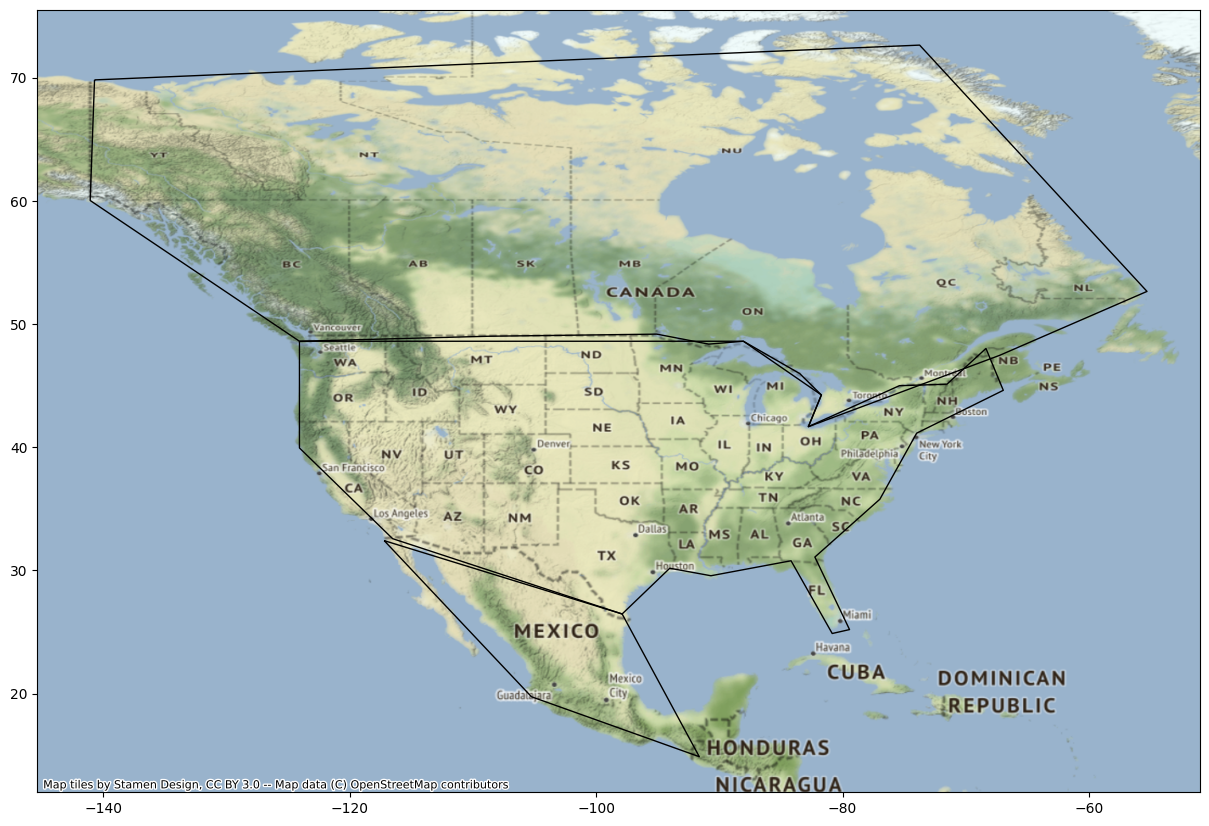

In [14]:
ax = countries.plot(figsize=(15,15), edgecolor='black', facecolor='none')
cx.add_basemap(ax, crs=countries.crs)


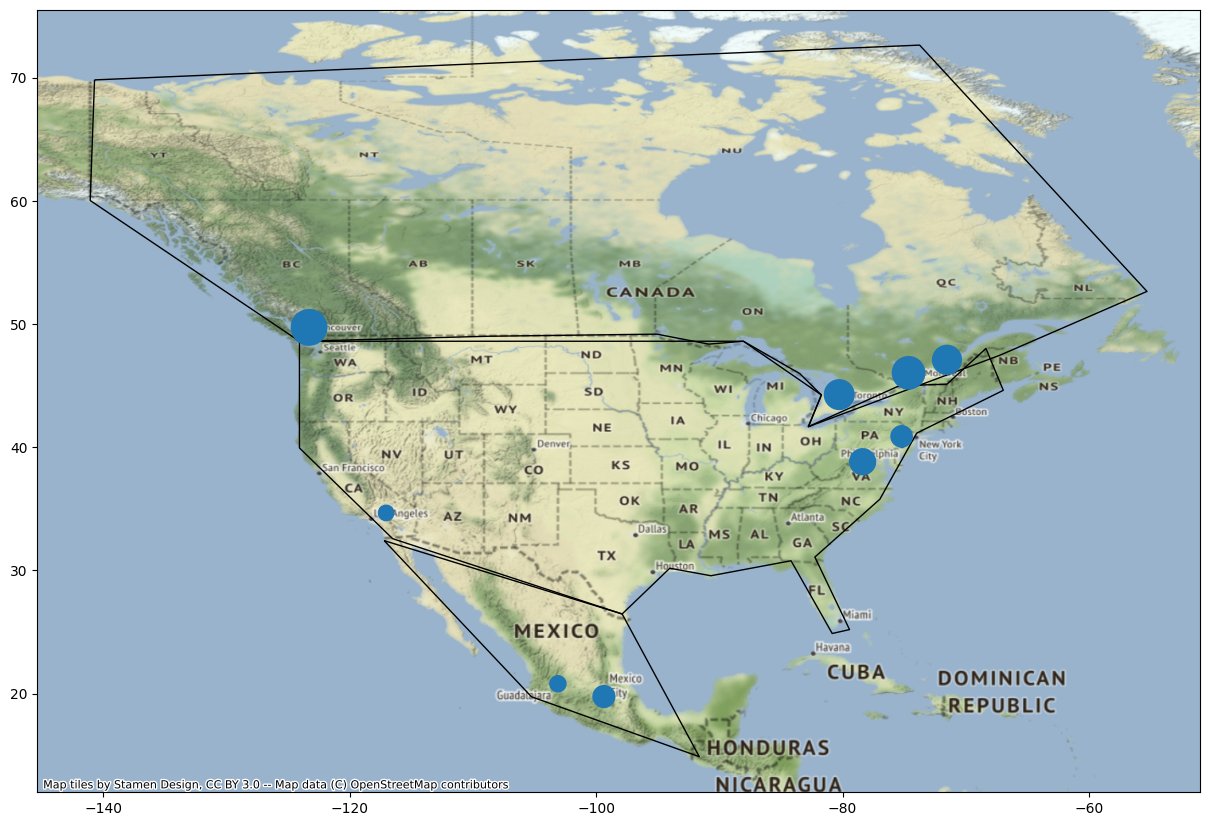

In [15]:
ax = countries.plot(figsize=(15,15), edgecolor='black', facecolor='none')
cities_new.plot(ax=ax, markersize=cities_new['population'] // 10, figsize=(15,15))
cx.add_basemap(ax, crs=countries.crs)


In [16]:
cities_3 = cities_new.sjoin(countries, how="inner", predicate='within')
cities_3


Name_left description_left timestamp_left begin_left end_left  \
0    Las Vegas             None            NaT        NaT      NaT   
1     New York             None            NaT        NaT      NaT   
2   Washington             None            NaT        NaT      NaT   
3      Toronto             None            NaT        NaT      NaT   
4       Quebec             None            NaT        NaT      NaT   
5     Montreal             None            NaT        NaT      NaT   
6    Vancouver             None            NaT        NaT      NaT   
7  Guadalajara             None            NaT        NaT      NaT   
8  Mexico City             None            NaT        NaT      NaT   

  altitudeMode_left  tessellate_left  extrude_left  visibility_left  \
0              None               -1             0               -1   
1              None               -1             0               -1   
2              None               -1             0               -1   
3              None               -1             0               -1   
4              None               -1             0               -1   
5              None               -1             0               -1   
6              None               -1             0               -1   
7              None               -1             0               -1   
8              None               -1             0               -1   

  drawOrder_left  ... description_right timestamp_right begin_right  \
0           None  ...              None             NaT         NaT   
1           None  ...              None             NaT         NaT   
2           None  ...              None             NaT         NaT   
3           None  ...              None             NaT         NaT   
4           None  ...              None             NaT         NaT   
5           None  ...              None             NaT         NaT   
6           None  ...              None             NaT         NaT   
7           None  ...              None             NaT         NaT   
8           None  ...              None             NaT         NaT   

   end_right  altitudeMode_right tessellate_right extrude_right  \
0        NaT                None               -1             0   
1        NaT                None               -1             0   
2        NaT                None               -1             0   
3        NaT                None               -1             0   
4        NaT                None               -1             0   
5        NaT                None               -1             0   
6        NaT                None               -1             0   
7        NaT                None               -1             0   
8        NaT                None               -1             0   

  visibility_right drawOrder_right icon_right  
0               -1            None       None  
1               -1            None       None  
2               -1            None       None  
3               -1            None       None  
4               -1            None       None  
5               -1            None       None  
6               -1            None       None  
7               -1            None       None  
8               -1            None       None  

[9 rows x 26 columns]

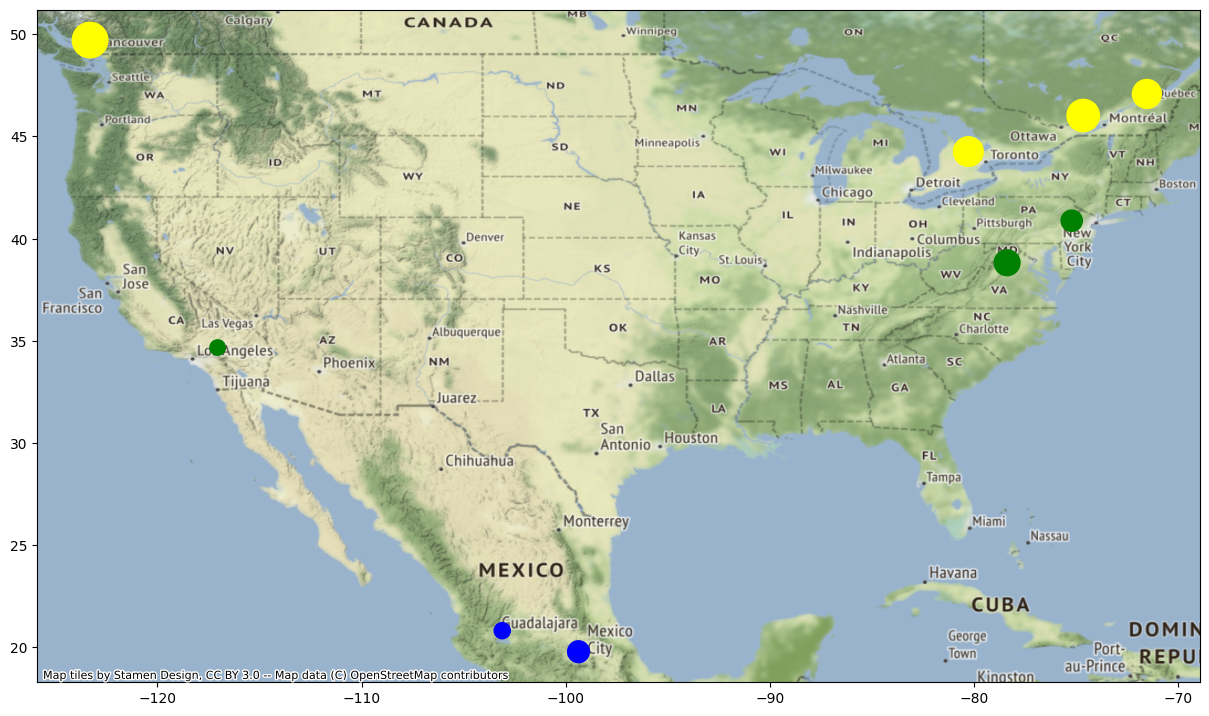

In [17]:
cities_3['color'] = cities_3['index_right'].map({0: 'green', 1: 'yellow', 2: 'blue'})

ax = cities_3.plot(markersize=cities_3['population'] // 10, c=cities_3['color'], figsize=(15,15))
cx.add_basemap(ax, crs=cities_3.crs)


In [18]:
countries['Area'] = ['North America', 'North America', 'Middle America']
countries


Name description timestamp begin end altitudeMode  tessellate  extrude  \
0      US        None       NaT   NaT NaT         None          -1        0   
1  Canada        None       NaT   NaT NaT         None          -1        0   
2  Mexico        None       NaT   NaT NaT         None          -1        0   

   visibility drawOrder  icon  \
0          -1      None  None   
1          -1      None  None   
2          -1      None  None   

                                            geometry            Area  
0  POLYGON Z ((-124.08614 48.59385 0.00000, -124....   North America  
1  POLYGON Z ((-140.72136 69.80715 0.00000, -141....   North America  
2  POLYGON Z ((-117.20749 32.40949 0.00000, -105....  Middle America

In [19]:
areas = countries.dissolve(by='Area')[['geometry']]
areas


geometry
Area                                                             
Middle America  POLYGON Z ((-117.20749 32.40949 0.00000, -105....
North America   POLYGON Z ((-66.95723 44.61098 0.00000, -73.98...

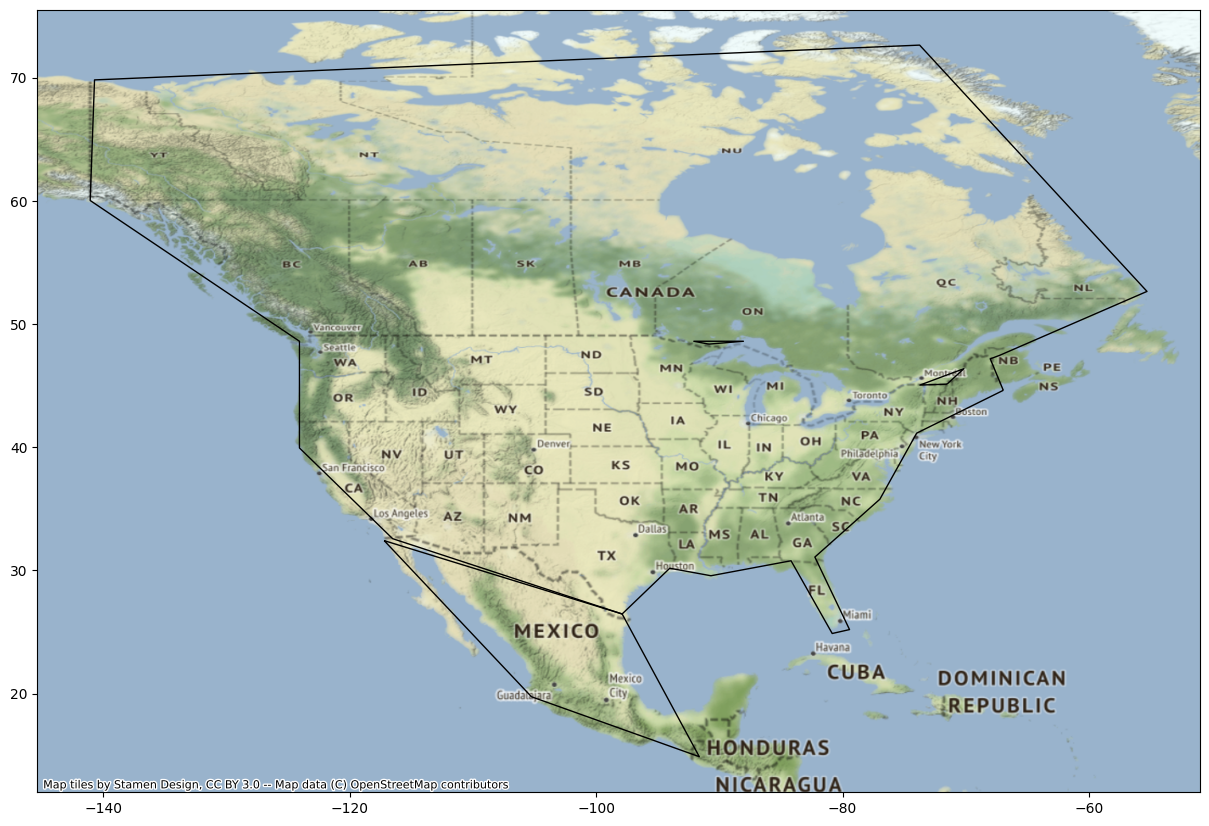

In [20]:
ax = areas.plot(figsize=(15,15), edgecolor='black', facecolor='none')
cx.add_basemap(ax, crs=areas.crs)
